In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout
from keras.layers import Dense
from keras import optimizers
from keras.regularizers import l2
import nilearn

In [2]:
#import tensorflow as tf

In [5]:

classifier = Sequential()
# convolution layer: weighted sum between two signals. Features are extracted at k x k sized matrices to calculate the convolution at a specific x, y location 
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
# Pooling 
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))
# Add convolution layer 2 
classifier.add(Conv2D(32,3,3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))
# Flatten 
classifier.add(Flatten())

# Full connection 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compile
classifier.compile(loss= 'binary_crossentropy', optimizer = 'Adam',metrics=['accuracy'])

C:\Users\Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., activation="relu")`
  if __name__ == '__main__':


In [6]:
import numpy as np
import pandas as pd
import zipfile
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.5,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Train',
target_size = (64, 64),
class_mode = 'binary')

Found 906 images belonging to 2 classes.


C:\Users\Kim\Anaconda3\lib\site-packages\keras\preprocessing\image.py:440: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  image.ImageDataGenerator.__init__).args:


In [8]:
test_set = test_datagen.flow_from_directory('Test',
target_size = (64, 64),
class_mode = 'binary')

Found 366 images belonging to 2 classes.


In [9]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
__________

In [10]:
model_3img = classifier.fit_generator(training_set,
                        steps_per_epoch=6000,
                        epochs=25,
                        validation_data=test_set,
                        validation_steps=2000,
                        workers=4
                        )

Instructions for updating:
Use tf.cast instead.


C:\Users\Kim\Anaconda3\lib\site-packages\keras\utils\data_utils.py:651: DeprecationWarning: `wait_time` is not used anymore.
  DeprecationWarning)


Epoch 1/25
6000/6000 [==============================] - 833s 139ms/step - loss: 0.3839 - acc: 0.8451 - val_loss: 0.4122 - val_acc: 0.8361
Epoch 2/25
6000/6000 [==============================] - 827s 138ms/step - loss: 0.3186 - acc: 0.8776 - val_loss: 0.4429 - val_acc: 0.8307
Epoch 3/25
6000/6000 [==============================] - 834s 139ms/step - loss: 0.3014 - acc: 0.8852 - val_loss: 0.4842 - val_acc: 0.8333
Epoch 4/25
6000/6000 [==============================] - 833s 139ms/step - loss: 0.2898 - acc: 0.8923 - val_loss: 0.4890 - val_acc: 0.8443
Epoch 5/25
6000/6000 [==============================] - 831s 139ms/step - loss: 0.2791 - acc: 0.8976 - val_loss: 0.6831 - val_acc: 0.8223
Epoch 6/25
6000/6000 [==============================] - 831s 139ms/step - loss: 0.2684 - acc: 0.9026 - val_loss: 0.4897 - val_acc: 0.8443
Epoch 7/25
6000/6000 [==============================] - 830s 138ms/step - loss: 0.2325 - acc: 0.9215 - val_loss: 0.4237 - val_acc: 0.8661
Epoch 13/25
6000/6000 [===========

In [12]:
accuracy = model_3img.history['acc']
val_accuracy = model_3img.history['val_acc']
loss = model_3img.history['loss']
val_loss = model_3img.history['val_loss']
epochs = range(len(accuracy))

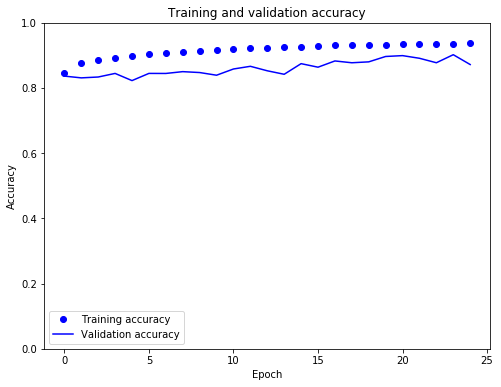

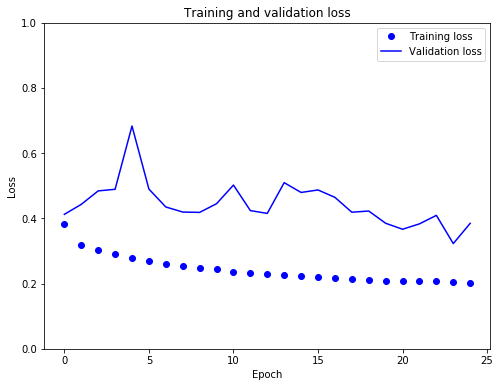

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [24]:
# test loss and accuracy 
classifier.evaluate_generator(generator=test_set, steps = 20)

C:\Users\Kim\Anaconda3\lib\site-packages\keras\utils\data_utils.py:651: DeprecationWarning: `wait_time` is not used anymore.
  DeprecationWarning)


[0.384245078887371, 0.8791390726503158]

In [25]:
# train loss and accuracy 
classifier.evaluate_generator(generator= training_set, steps = 20)

[0.13729883532693857, 0.9676375404530745]

In [26]:
#labels = (test_set.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#predictions = [labels[k] for k in predicted_class_indices]
#predictions